## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Forecasting using ML

In [18]:
import numpy as np
import pandas as pd

from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)

### Forecasters in sktime

Check out our online estimator overview at: https://www.sktime.org/en/stable/estimator_overview.html

In [19]:
from sktime.registry import all_estimators

In [20]:
#all_estimators("forecaster", as_dataframe=True)

In [21]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

#### The Data 

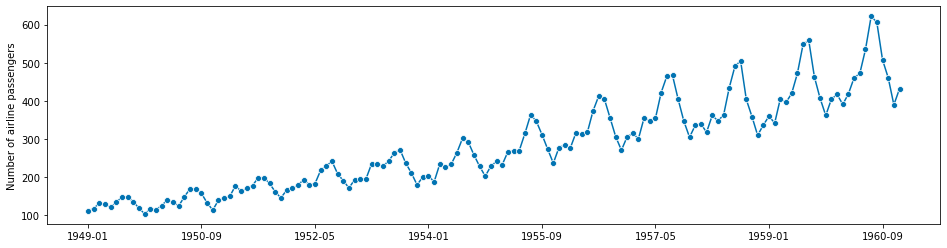

In [22]:
y = load_airline()
plot_series(y);

In [23]:
y_train, y_test = temporal_train_test_split(y, test_size=12)

fh = ForecastingHorizon(y_test.index, is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

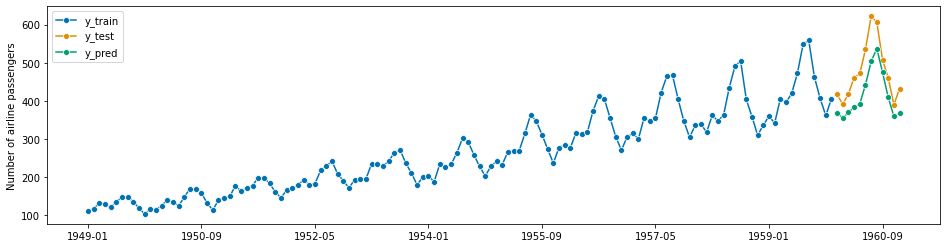

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=3)

#Convert the data to tabular form
forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)

y_pred = forecaster.predict()

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

#### Temporal cross-validation

In [25]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter, SlidingWindowSplitter
import utilities as ut

ModuleNotFoundError: No module named 'utilities'

In [26]:
fh = ForecastingHorizon(np.arange(12) + 1)

cv = ExpandingWindowSplitter(step_length=3, fh=fh, initial_window=10)
ut.plot_windows(cv, y.iloc[:50])

NameError: name 'ut' is not defined

#### Backtesting: Evaluation using temporal cross-validaton

In [27]:
cv = ExpandingWindowSplitter(step_length=12, fh=fh, initial_window=72)

results = evaluate(forecaster=forecaster, y=y, cv=cv, 
                   strategy="refit", return_data=True)
results.iloc[:, :5].head()

C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This 

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.156801,0.004658,0.008862,72,1954-12
1,0.117312,0.005148,0.006639,84,1955-12
2,0.100374,0.005006,0.007033,96,1956-12
3,0.050407,0.005056,0.007611,108,1957-12
4,0.101276,0.005529,0.007122,120,1958-12


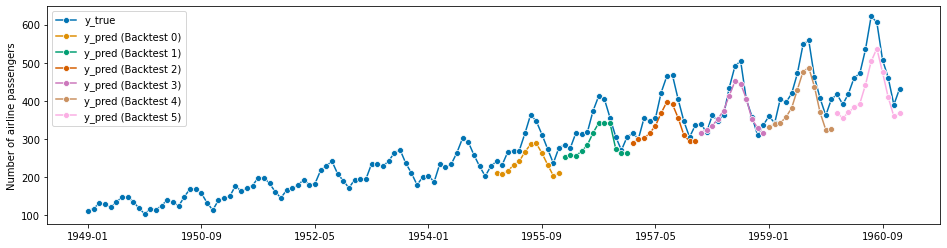

In [28]:
fig, ax = plot_series(
    y,
    results["y_pred"].iloc[0],
    results["y_pred"].iloc[1],
    results["y_pred"].iloc[2],
    results["y_pred"].iloc[3],
    results["y_pred"].iloc[4],
    results["y_pred"].iloc[5],
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(6)],
)
ax.legend();

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

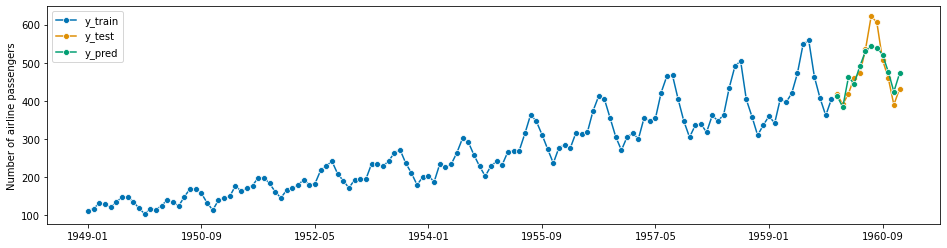

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction

y_train, y_test = temporal_train_test_split(y, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)

regressor = RandomForestRegressor(n_estimators=50)

forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)

y_pred = forecaster.predict()

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [30]:
fh = ForecastingHorizon(np.arange(12) + 1)
cv = ExpandingWindowSplitter(step_length=12, fh=fh, initial_window=72)

results = evaluate(forecaster=forecaster, y=y, cv=cv, 
                   strategy="refit", return_data=True)
results.iloc[:, :5].head()

C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\NageshN\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:357: UserWarning: y_pred and y_true do not have the same column index. This 

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.125204,0.060341,0.042908,72,1954-12
1,0.058425,0.055860,0.042735,84,1955-12
2,0.073876,0.057528,0.043340,96,1956-12
3,0.141021,0.061962,0.043492,108,1957-12
4,0.063843,0.063079,0.044483,120,1958-12


***

In [31]:
results

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred
0,0.125204,0.060341,0.042908,72,1954-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1955-01 242.0 1955-02 233.0 1955-03 2...,1955-01 222.82 1955-02 211.52 1955-03 ...
1,0.058425,0.055860,0.042735,84,1955-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1956-01 284.0 1956-02 277.0 1956-03 3...,1956-01 265.02 1956-02 269.64 1956-03 ...
2,0.073876,0.057528,0.043340,96,1956-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1957-01 315.0 1957-02 301.0 1957-03 3...,1957-01 318.96 1957-02 318.54 1957-03 ...
3,0.141021,0.061962,0.043492,108,1957-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1958-01 340.0 1958-02 318.0 1958-03 3...,1958-01 353.12 1958-02 353.26 1958-03 ...
4,0.063843,0.063079,0.044483,120,1958-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1959-01 360.0 1959-02 342.0 1959-03 4...,1959-01 343.38 1959-02 345.12 1959-03 ...
5,0.053874,0.065901,0.053469,132,1959-12,1949-01 112.0 1949-02 118.0 1949-03 1...,1960-01 417.0 1960-02 391.0 1960-03 4...,1960-01 408.38 1960-02 378.18 1960-03 ...


In [32]:
results['y_pred'].iloc[0]

1955-01    222.82
1955-02    211.52
1955-03    231.64
1955-04    232.26
1955-05    243.92
1955-06    277.68
1955-07    280.40
1955-08    282.42
1955-09    275.38
1955-10    241.52
1955-11    232.30
1955-12    229.24
Freq: M, dtype: float64

In [33]:
type(results)

pandas.core.frame.DataFrame